<a href="https://colab.research.google.com/github/pych0413/mnist_ImageClassification/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
# Import the data, split between train and validation sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The dataset has 70000 images which are 28x28 pixel. It is divided into training dataset and testing dataset. The training dataset has 60000 images and the testing dataset has 10000 images.

In [ ]:
# Preprocess (Categorically and one-hot encoding)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

Reshape the data and use categorical function to define 10 class for classification.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

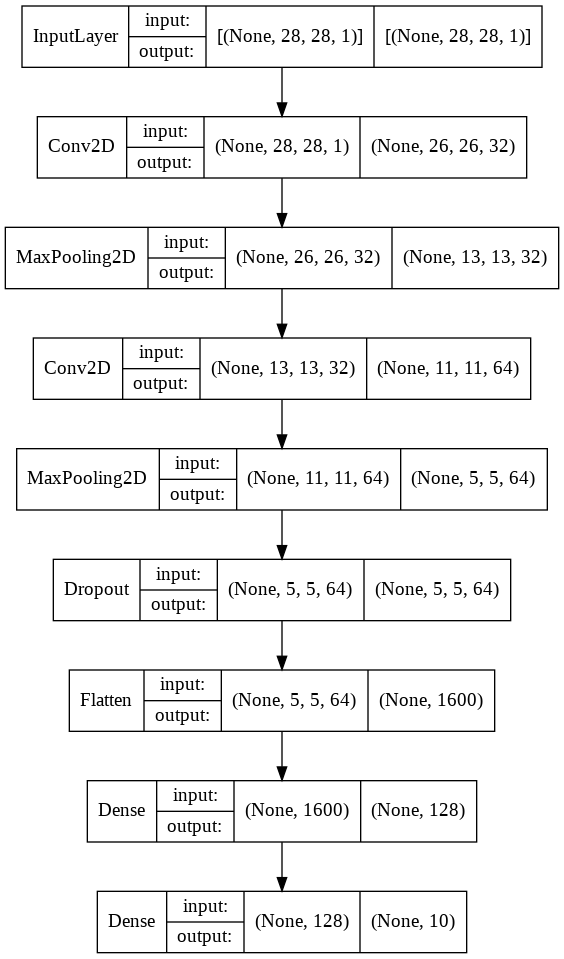

In [ ]:
# Creating the Model 
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])

# Show the model
plot_model(model, show_shapes=True, show_layer_names=False)

This model has 2 convolution layers including the MaxPooling layers.

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/5
375/375 [==============================] - 3s 6ms/step - loss: 1.3480 - accuracy: 0.6207 - val_loss: 0.3405 - val_accuracy: 0.8963
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3467 - accuracy: 0.8936 - val_loss: 0.2250 - val_accuracy: 0.9295
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2710 - accuracy: 0.9154 - val_loss: 0.1864 - val_accuracy: 0.9392
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2244 - accuracy: 0.9302 - val_loss: 0.1564 - val_accuracy: 0.9488
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1932 - accuracy: 0.9390 - val_loss: 0.1366 - val_accuracy: 0.9567


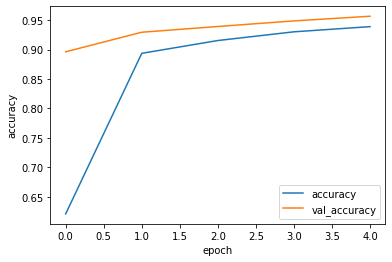

In [ ]:
# Analysis the Accuracy result
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

The validation accuracy is increasing with the epoch is increasing.

In [ ]:
# Test Result
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9602
Test loss: 0.12322928756475449
Test accuracy: 0.9602000117301941


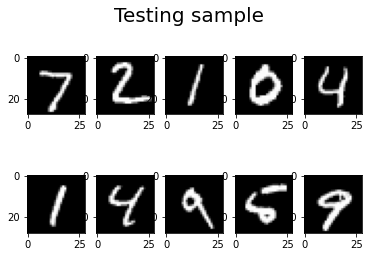

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
# Predict the test sample
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle("Testing sample", fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

In [ ]:
# Optimize the model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalization
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

his_dir = [[],[],[],[],[],[]]

def new_model(drop_rate=0.3, conv_1_size=32, conv_1_kernel_size=3, conv_2_size=64, conv_2_kernel_size=3, lr=0.1, bs=128, epo=20):

    global model, history, score
    conv_1_kernel = (conv_1_kernel_size, conv_1_kernel_size)
    conv_2_kernel = (conv_2_kernel_size, conv_2_kernel_size)

    model = Sequential()

    model.add(Conv2D(filters=conv_1_size,kernel_size=conv_1_kernel, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=drop_rate))

    model.add(Conv2D(filters=conv_2_size,kernel_size=conv_2_kernel, activation='relu', input_shape=(28,28,1)))
    model.add(Dropout(rate=drop_rate))

    model.add(Flatten())
    model.add(Dense(units = 128, activation='relu'))

    model.add(Dense(units = 10, activation='softmax'))

    model.compile(
    # Change the optimizer and learning rate
    optimizer = optimizers.SGD(learning_rate = lr),
    
    # Optimize the loss Function
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])
    
    # Optimize the batch size and epoch
    history = model.fit(X_train, y_train, verbose=0, batch_size=bs, epochs=epo, validation_data=(X_valid, y_valid))

    score = model.evaluate(X_test, y_test, verbose=0)
    print("\nNew Model:\nDrop rate: {0}\nLearning rate: {1}\nBatch size: {2}\nEpochs: {3}\nConv size: {4},{5}\nConv kernel: {6},{7}".format(drop_rate, lr, bs, epo, conv_1_size, conv_2_size, conv_1_kernel, conv_2_kernel))
    print("Testing Loss: {0[0]}\nTesting Accuracy: {0[1]}".format(score))
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="best")
    plt.show()

    # Record the hyper parameter and accuracy
    append_list = [conv_1_size, conv_1_kernel_size, conv_2_size, conv_2_kernel_size, score[0], score[1]]
    for i in range(len(his_dir)):
      his_dir[i].append(append_list[i])



New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 16,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.030515030026435852
Testing Accuracy: 0.9900000095367432


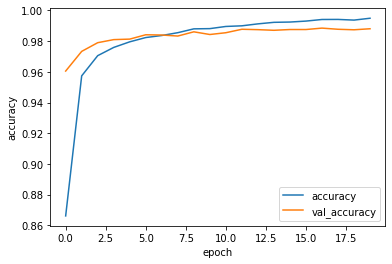


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03681980445981026
Testing Accuracy: 0.9889000058174133


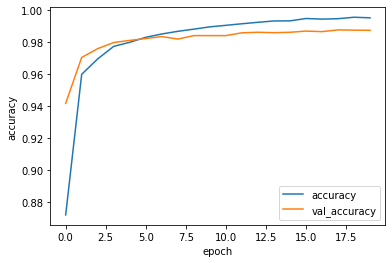


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 48,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.036138374358415604
Testing Accuracy: 0.9896000027656555


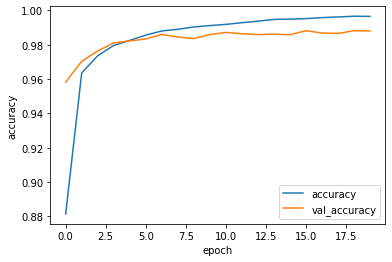


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 64,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.034789253026247025
Testing Accuracy: 0.9894000291824341


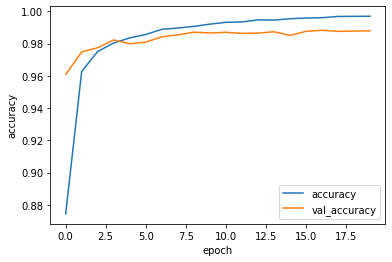


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 80,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.035085488110780716
Testing Accuracy: 0.9884999990463257


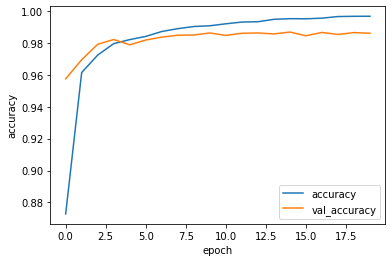


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 96,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03494502604007721
Testing Accuracy: 0.9897000193595886


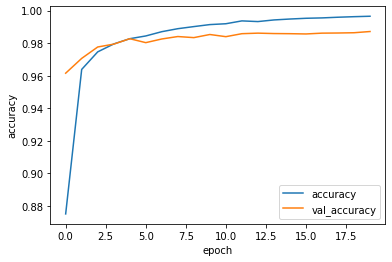


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 112,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03757963329553604
Testing Accuracy: 0.9886000156402588


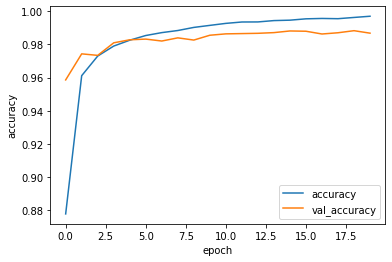


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 128,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.037759486585855484
Testing Accuracy: 0.9890000224113464


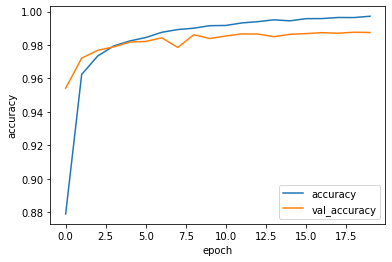

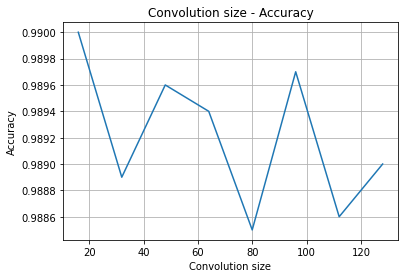

In [ ]:
# Clear record
his_dir = [[],[],[],[],[],[]]

# Analysis the relationship between convolution size and accuracy
conv_size = [8, 16, 32, 48, 64, 80, 96, 112, 128]

for i in range(len(conv_size)):
  new_model(drop_rate=0.3, conv_1_size=conv_size[i], conv_1_kernel_size=3, conv_2_size=64, conv_2_kernel_size=3, lr=0.1, bs=128, epo=20)

# Display the relationship between convolution size and accuracy
plt.title('Convolution size - Accuracy')
plt.xlabel('Convolution size')
plt.ylabel('Accuracy')
plt.grid(True)

plt.plot(his_dir[0],his_dir[5])
plt.show()

The accuracy is decreasing with the convolution size is increasing.


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03317120671272278
Testing Accuracy: 0.9901000261306763


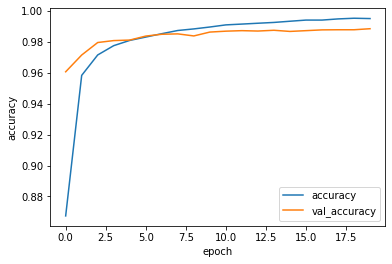


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (4, 4),(3, 3)
Testing Loss: 0.03063984587788582
Testing Accuracy: 0.9904999732971191


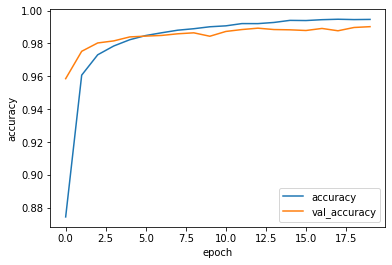


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (5, 5),(3, 3)
Testing Loss: 0.028656216338276863
Testing Accuracy: 0.9904000163078308


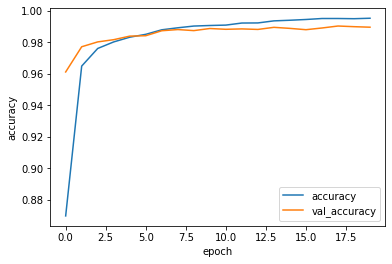


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (6, 6),(3, 3)
Testing Loss: 0.027982749044895172
Testing Accuracy: 0.9909999966621399


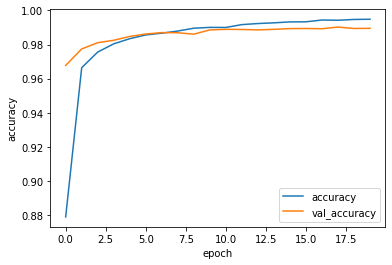


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (7, 7),(3, 3)
Testing Loss: 0.02336391992866993
Testing Accuracy: 0.9922000169754028


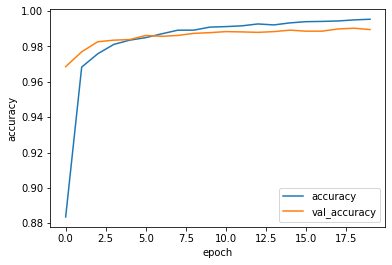

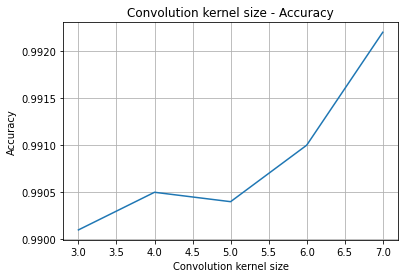

In [ ]:
# Clear record
his_dir = [[],[],[],[],[],[]]

# Analysis the relationship between convolution kernel size and accuracy
conv_kernel_size = [3, 4, 5, 6, 7]

for i in range(len(conv_kernel_size)):
  new_model(drop_rate=0.3, conv_1_size=32, conv_1_kernel_size=conv_kernel_size[i], conv_2_size=64, conv_2_kernel_size=3, lr=0.1, bs=128, epo=20)

# Display the relationship between convolution kernel size and accuracy
plt.title('Convolution kernel size - Accuracy')
plt.xlabel('Convolution kernel size')
plt.ylabel('Accuracy')
plt.grid(True)

plt.plot(his_dir[1],his_dir[5])
plt.show()

The accuracy is increasing with the Convolution kernel size is increasing.


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,32
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03548499196767807
Testing Accuracy: 0.9891999959945679


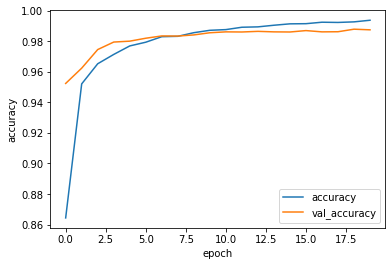


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 64,32
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03486711531877518
Testing Accuracy: 0.9884999990463257


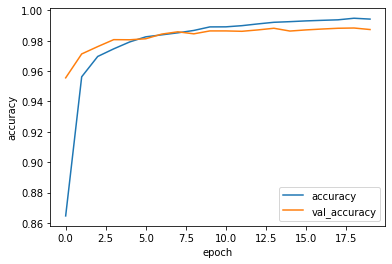


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 128,32
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.033829785883426666
Testing Accuracy: 0.9894999861717224


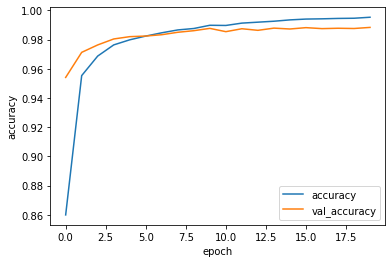


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,64
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.031524695456027985
Testing Accuracy: 0.989799976348877


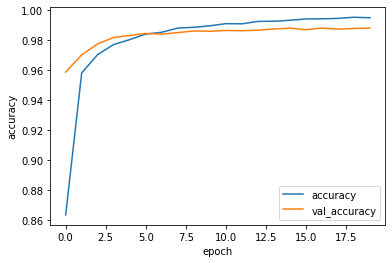


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 64,64
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03674513101577759
Testing Accuracy: 0.9889000058174133


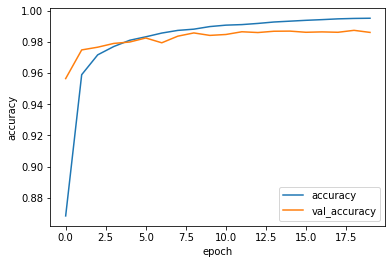


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 128,64
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03246799856424332
Testing Accuracy: 0.9894999861717224


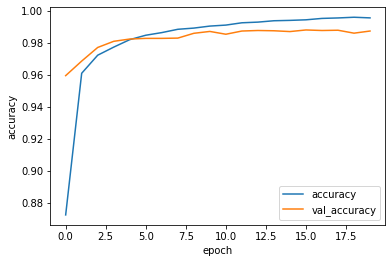


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 32,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03856364265084267
Testing Accuracy: 0.9894999861717224


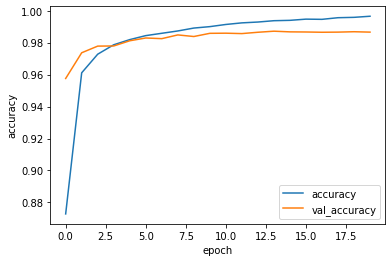


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 64,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03631739690899849
Testing Accuracy: 0.9890000224113464


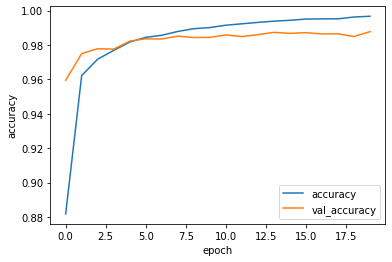


New Model:
Drop rate: 0.3
Learning rate: 0.1
Batch size: 128
Epochs: 20
Conv size: 128,128
Conv kernel: (3, 3),(3, 3)
Testing Loss: 0.03651751950383186
Testing Accuracy: 0.989300012588501


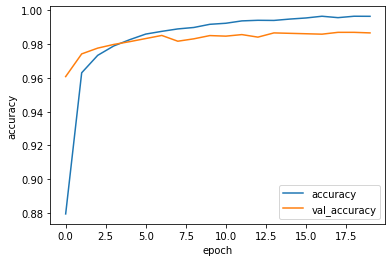

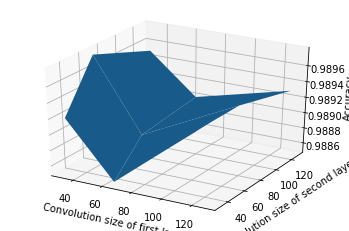

In [ ]:
# Clear record
his_dir = [[],[],[],[],[],[]]

# Analysis the relationship between different convolution layer
conv_size = [32, 64, 128]

for i in range(len(conv_size)):
  for j in range(len(conv_size)):
    new_model(drop_rate=0.3, conv_1_size=conv_size[j], conv_1_kernel_size=3, conv_2_size=conv_size[i], conv_2_kernel_size=3, lr=0.1, bs=128, epo=20)

# Display the relationship between different convolution layer
X, Y = np.meshgrid(conv_size, conv_size)
Z = np.array(his_dir[5]).reshape(len(conv_size),len(conv_size))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Convolution size of first layer')
ax.set_ylabel('Convolution size of second layer')
ax.set_zlabel('Accuracy')
plt.show()

The accuracy is the highest when the first convolution size is 32 and the second convolution size is 64.


New Model:
Drop rate: 0.3
Learning rate: 0.05
Batch size: 128
Epochs: 30
Conv size: 32,64
Conv kernel: (7, 7),(7, 7)
Testing Loss: 0.021080106496810913
Testing Accuracy: 0.9934999942779541


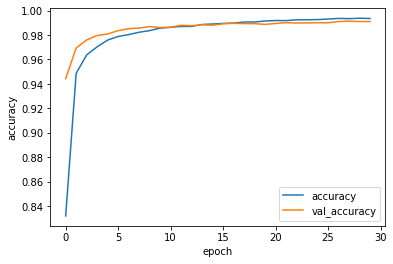

In [ ]:
# The Best Model
new_model(drop_rate=0.3, conv_1_size=32, conv_1_kernel_size=7, conv_2_size=64, conv_2_kernel_size=7, lr=0.05, bs=128, epo=30)

This is the best model with 99.35% testing accuracy.